In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram # just for displaying
from sklearn.cluster import AgglomerativeClustering


In [3]:
def get_linkage_matrix(children, distances, n_samples):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(children.shape[0])
    for i, merge in enumerate(children):
        counts[i] = sum(1 if child_idx < n_samples else counts[child_idx - n_samples] for child_idx in merge)
    linkage_matrix = np.column_stack([children,distances, counts]).astype(float)
    return linkage_matrix

TypeError: get_linkage_matrix() missing 2 required positional arguments: 'distances' and 'n_samples'

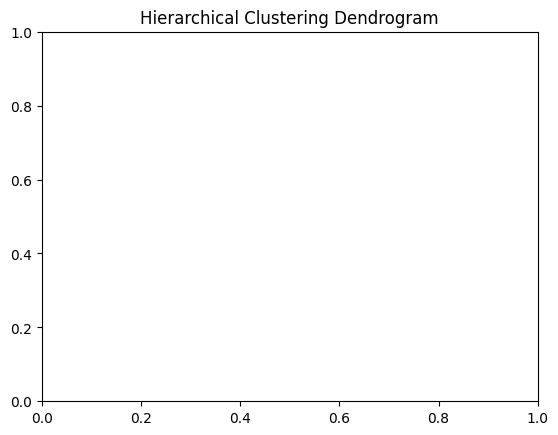

In [4]:
X = np.array([
    list('ACGCGATGACCGGGCCTTGTA'),
    list('ATGATGACAGGGCTTGTAACT'),
    list('TTCATGACCGGCTTATACTTA')
])

# one hot encode the data
X = np.array([[1 if x == y else 0 for x in 'ACGT'] for y in X.flatten()]).reshape(X.shape[0], -1)
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
children = model.children_
distances = model.distances_
n_samples = len(model.labels_)
linkage_mat = get_linkage_matrix(children, distances, n_samples)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()